In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iminuit import Minuit

## Setting matplotlib
mpl.rcParams.update({'font.size': 14})
mpl.rcParams.update({'axes.facecolor':'w'})
mpl.rcParams.update({'axes.edgecolor':'k'})
mpl.rcParams.update({'figure.facecolor':'w'})
mpl.rcParams.update({'figure.edgecolor':'w'})
mpl.rcParams.update({'axes.grid':True})
mpl.rcParams.update({'grid.linestyle':':'})
mpl.rcParams.update({'figure.figsize':[12,9]})

#source codeの表示用
from inspect import getsource

# fitting1-3
実験者の知らない系統誤差が存在していて、フィッテング関数が上手い関数でない場合。

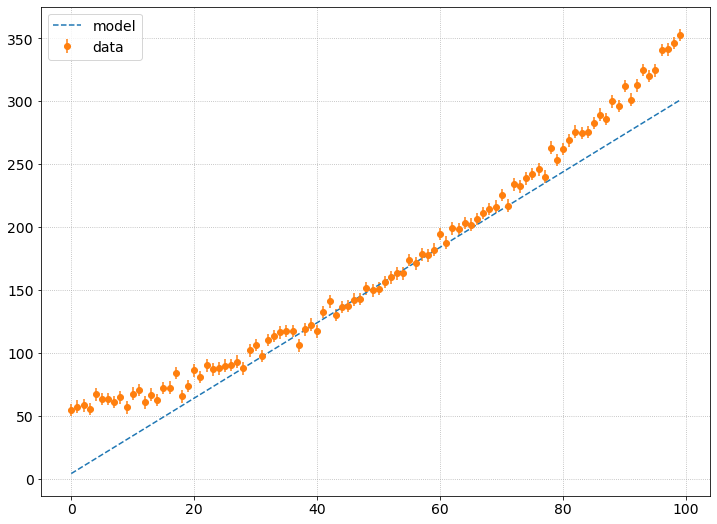

In [14]:
a_model = 3
b_model = 4
c_unkown = 0.02

xdata = np.arange(0, 100, 1)

#それぞれのデータ点にerrorbarを乗せる
err_model = 5

ymodel = a_model*xdata + b_model
ydata = c_unkown*(xdata-50)**2 + a_model*xdata + b_model + err_model*np.random.randn(len(xdata))

plt.plot(xdata, ymodel, "--", label="model")
plt.errorbar(xdata, ydata, yerr=err_model, fmt="o", label="data")
plt.legend()

# fitting関数を定義する

In [15]:
def fitfunc(x, a, b):
    return a*x + b

# fittingを行う
一番初めにcost関数(=χ二乗)を定義している。

In [16]:
#最小化を行う関数を定義
def fit(xdata, ydata, yerr, a_init, b_init):
    def cost(a, b):
        return np.sum((ydata - fitfunc(xdata, a, b))**2 / yerr**2)
    
    #minuitによるfitに必要なパラメータを定義
    error_a = 0.1*a_init
    error_b = 0.1*b_init
    
    #最小化するモデルを定義
    m = Minuit(cost, errordef=1,
              a = a_init, error_a=error_a,
              b = b_init, error_b=error_b)
    
    return m

#実際に最小化を行う
m = fit(xdata=xdata, ydata=ydata, yerr=err_model, a_init=1, b_init=1)
m.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 996.7                      │        Ncalls = 32 (32 total)        │
│ EDM = 4.61e-21 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   2.992   │   0.017   │            │            │         │         │       │
│ 1 │ b    │   20.8    │    1.0    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

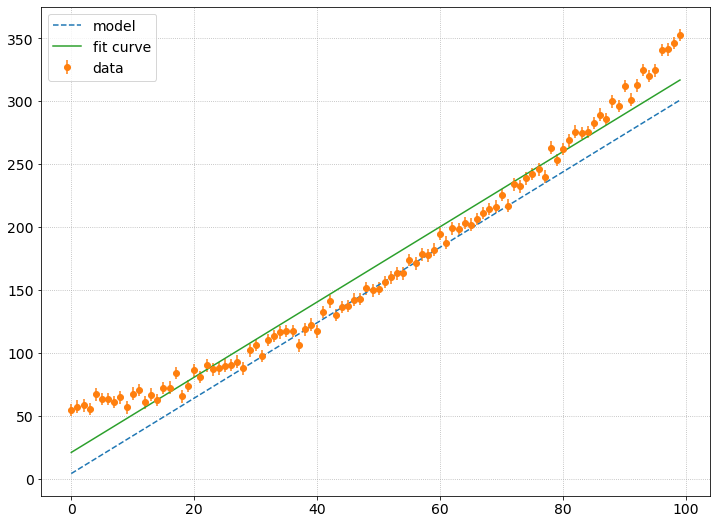

In [17]:
plt.plot(xdata, ymodel, "--", label="model")
plt.errorbar(xdata, ydata, yerr=err_model, fmt="o", label="data")
plt.plot(xdata, fitfunc(xdata, *m.values.values()), label="fit curve")
plt.legend()

# reduced chisqの計算

In [30]:
m.fval / (len(ydata) - m.nfit)

10.170522511712056

==> 10であり、良いフィッテングとは言えない。

# Minosによるerrorの見積もり

In [19]:
m.minos()

┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.017   │   0.017   │    -1     │     1     │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘

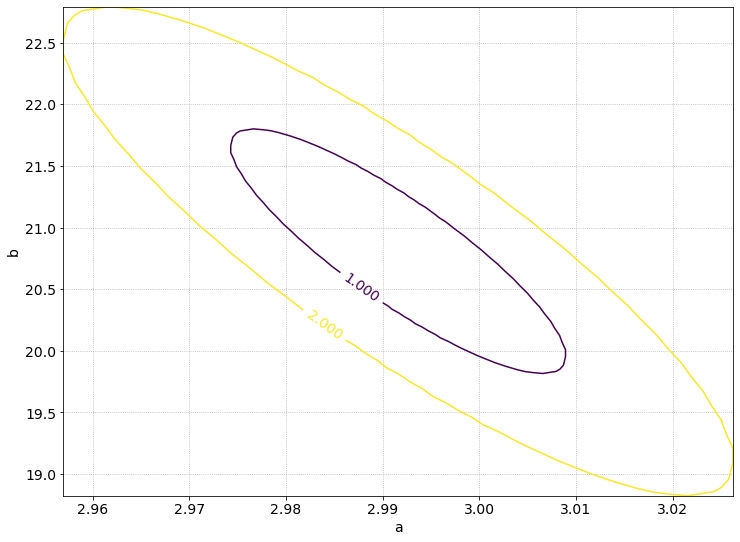

In [20]:
m.draw_mncontour('a','b', nsigma=2)

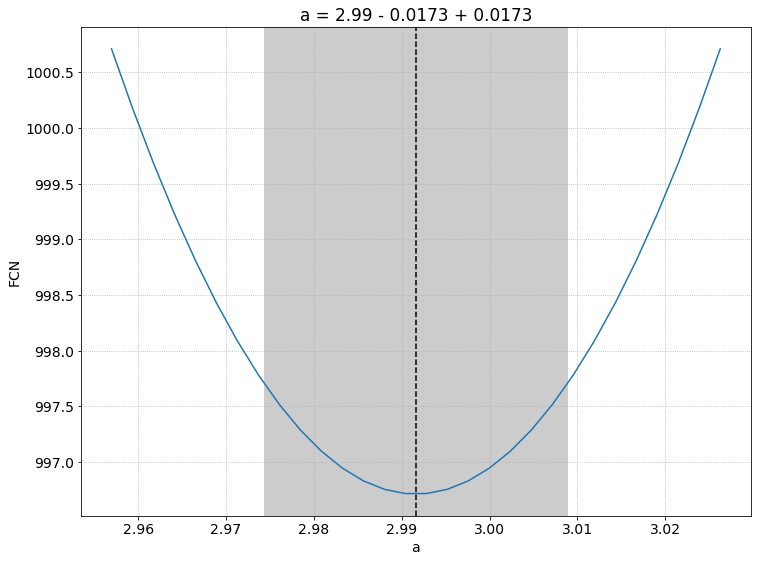

In [21]:
m.draw_mnprofile('a');

==> χ二乗が大きいのにχ二乗が最小から1大きくなったときをエラーバーにしているので、エラーバーを過小評価している。

# 改善案1
reduced chisqが1になるようにerrorbarを大きくとる。

In [33]:
#
err_model_prime = 15
mm = fit(xdata=xdata, ydata=ydata, yerr=err_model_prime, a_init=1, b_init=1)
mm.migrad()

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 110.7                      │        Ncalls = 32 (32 total)        │
│ EDM = 3.18e-22 (Goal: 0.0002)    │               up = 1.0               │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   2.99    │   0.05    │            │            │         │         │       │
│ 1 │ b    │   20.8    │    3.0    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘

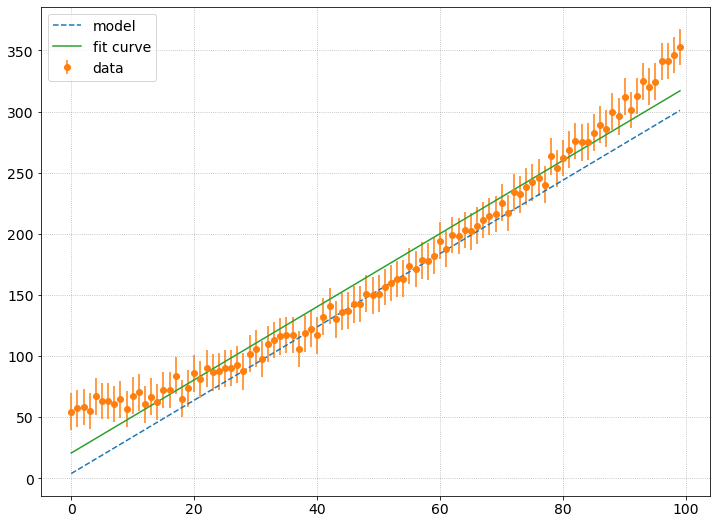

In [34]:
plt.plot(xdata, ymodel, "--", label="model")
plt.errorbar(xdata, ydata, yerr=err_model_prime, fmt="o", label="data")
plt.plot(xdata, fitfunc(xdata, *mm.values.values()), label="fit curve")
plt.legend()

# reduced chisqの計算

In [41]:
mm.fval / (len(ydata) - mm.nfit)

1.1300580568568965

# Minosによるerrorの見積もり

In [42]:
mm.minos()

┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │   -0.05   │   0.05    │    -3     │     3     │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘

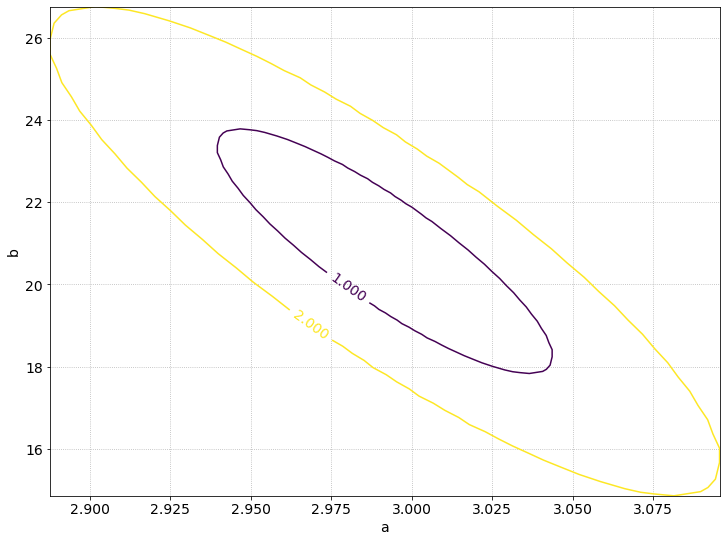

In [43]:
mm.draw_mncontour('a','b', nsigma=2)

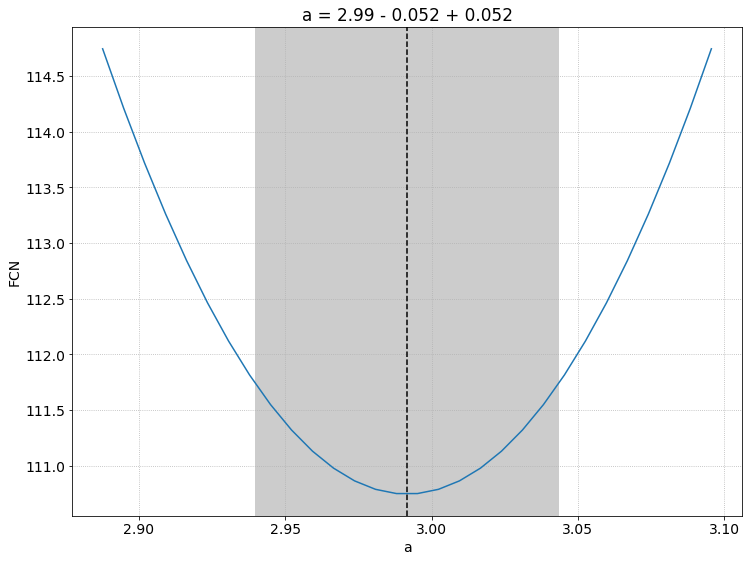

In [44]:
mm.draw_mnprofile('a');